# 🐾 Sprint 3 – Overlapping Sound Detection
This notebook implements overlapping sound detection based on MAEC methodology for Project Echo.

In [2]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from pathlib import Path

print("✅ Libraries loaded.")

✅ Libraries loaded.


## 📁 Set Paths

In [3]:
# Define your audio folder and output directory
audio_dir = Path(r"C:/Users/Lxf/Project-Echo/src/Prototypes/data_files")
output_dir = Path(r"C:/Users/Lxf/Project-Echo/src/Prototypes/overlap_detection_output")
output_dir.mkdir(parents=True, exist_ok=True)

## 📊 Preview Sample Audio

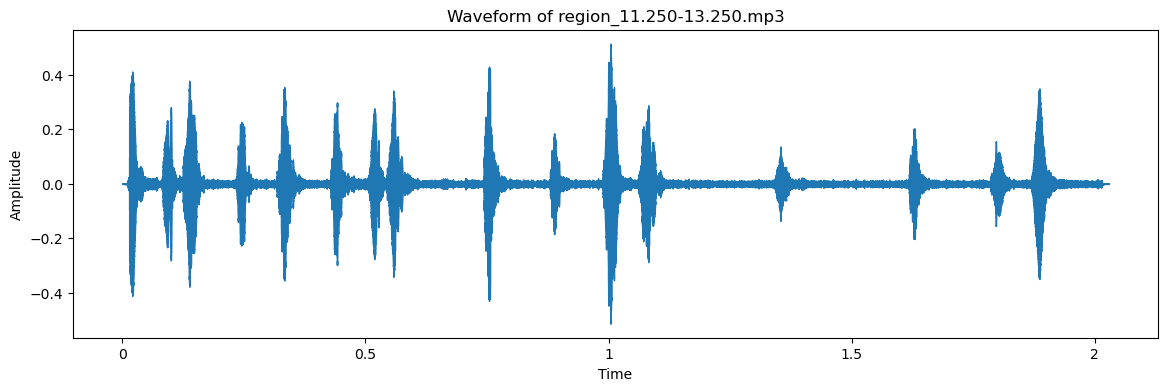

In [6]:
# Preview Sample Audio

def plot_waveform(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    plt.figure(figsize=(14, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform of {audio_path.name}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

# 用 rglob 递归查找 mp3
sample_files = list(audio_dir.rglob("*.mp3"))

if len(sample_files) == 0:
    print("❌ No .mp3 files found.")
else:
    plot_waveform(sample_files[0])


## 🔍 Simulate Overlapping Sound Detection

In [7]:
def detect_segments(y, sr, frame_len=2048, hop_len=512, threshold=0.02):
    energy = librosa.feature.rms(y=y, frame_length=frame_len, hop_length=hop_len)[0]
    frames = np.nonzero(energy > threshold)
    times = librosa.frames_to_time(frames, sr=sr, hop_length=hop_len)
    return times[0] if len(times) > 0 else []

# 重新用 sample_files[0]
y, sr = librosa.load(sample_files[0], sr=None)
onsets = detect_segments(y, sr)

print("Detected active frames:")
print(onsets)


Detected active frames:
[0.         0.01066667 0.02133333 0.032      0.04266667 0.07466667
 0.08533333 0.096      0.10666667 0.11733333 0.128      0.13866667
 0.14933333 0.16       0.17066667 0.224      0.23466667 0.24533333
 0.256      0.26666667 0.30933333 0.32       0.33066667 0.34133333
 0.352      0.36266667 0.416      0.42666667 0.43733333 0.448
 0.45866667 0.46933333 0.50133333 0.512      0.52266667 0.53333333
 0.544      0.55466667 0.56533333 0.576      0.58666667 0.72533333
 0.736      0.74666667 0.75733333 0.768      0.77866667 0.87466667
 0.88533333 0.896      0.90666667 0.98133333 0.992      1.00266667
 1.01333333 1.024      1.03466667 1.056      1.06666667 1.07733333
 1.088      1.09866667 1.10933333 1.33333333 1.344      1.35466667
 1.36533333 1.61066667 1.62133333 1.632      1.64266667 1.78133333
 1.792      1.80266667 1.81333333 1.824      1.856      1.86666667
 1.87733333 1.888      1.89866667 1.90933333]


## 🖼️ Visualize Detected Segments

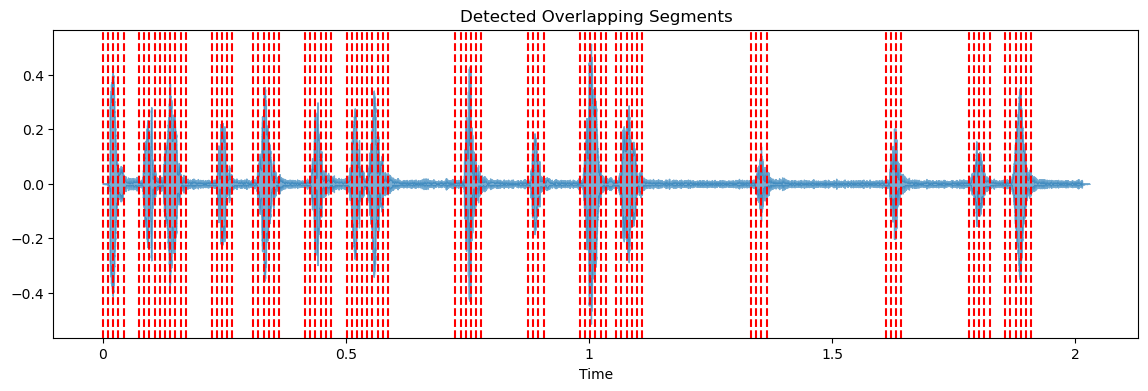

In [8]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
for onset in onsets:
    plt.axvline(x=onset, color='r', linestyle='--')
plt.title("Detected Overlapping Segments")
plt.xlabel("Time")
plt.show()

## 📦 Batch Process and Save Segments

In [10]:
for file in audio_dir.glob("*.mp3"):
    y, sr = librosa.load(file, sr=None)
    detected = detect_segments(y, sr)
    np.save(output_dir / f"{file.stem}_segments.npy", detected)
    print(f"✔️ Processed {file.name} — {len(detected)} segments")